<a href="https://colab.research.google.com/github/yrlmzmerve/Open_CV_Tutorial/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OPEN CV NOT DEFTERİ

### 1. RESMİ İÇERİ AKTARMA 

img dosyasını pythona aktarılması , veri tipi içerisinde depolanması

not: .py ile image aynı klasörde olmalı, eğer değilse image dosyasının pathi verilmeli

In [1]:
import cv2

In [2]:
img = cv2.imread("messi5.jpg",0)

In [8]:
from google.colab.patches import cv2_imshow

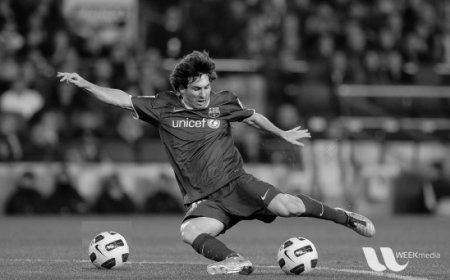

In [9]:
cv2_imshow(img)

In [10]:
img

array([[ 42,  47,  50, ...,  55,  53,  53],
       [ 45,  49,  53, ...,  59,  58,  58],
       [ 48,  54,  59, ...,  65,  64,  63],
       ...,
       [114, 107, 102, ..., 106, 110, 110],
       [118, 120, 111, ..., 111, 117, 117],
       [112, 120, 109, ..., 110, 105, 105]], dtype=uint8)

In [13]:
# siyah- beyaza çevrilen resmi kaydetmek

cv2.imwrite("mess_gray.png", img)

True

### 2. VİDEO İÇERİ AKTARMA 


In [14]:
import cv2
import time

In [15]:
video_name = "MOT17-04-DPM.mp4"

In [16]:
cap = cv2.VideoCapture(video_name)

In [17]:
cap

< cv2.VideoCapture 0x7f9849fb62d0>

In [19]:
print("Genişlik: ", cap.get(3))
print("Yükseklik: ", cap.get(4))

Genişlik:  1920.0
Yükseklik:  1080.0


In [20]:
if cap.isOpened()==False:
  print("ERROR ** Video açılamadı")

### 3. YENİDEN BOYUTLANDIRMA VE KIRPMA


#### Yeniden Boyutlandırma

In [21]:
import cv2

In [24]:
image = cv2.imread("lenna.png",1)

In [25]:
print("Resim boyutu: ",image.shape)

Resim boyutu:  (512, 512, 3)


In [26]:
imgResize = cv2.resize(image, (800,800))

In [27]:
print("Resized img shape:",imgResize.shape )

Resized img shape: (800, 800, 3)


512 * 512 'lik bir fotoğrafı 800*800 hale getirdik. Piksel büyüttük

#### Kırpma işlemi

In [30]:
from google.colab.patches import cv2_imshow

In [28]:
imgCropped = image[:200, :300] # 200 YÜKSEKLİK 300 GENİŞLİK

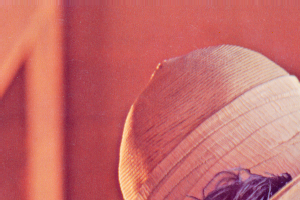

In [32]:
cv2_imshow(imgCropped)

### 4. ŞEKİL VE METİN *EKLEME*


In [46]:
import numpy as np

In [47]:
# şekil ekleme 
img = np.zeros((512,512,3), np.uint8) # siyah bir resim
print(img.shape)

(512, 512, 3)


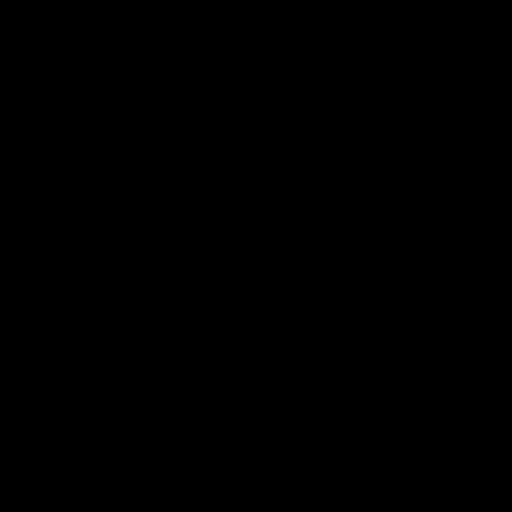

In [48]:
cv2_imshow(img)

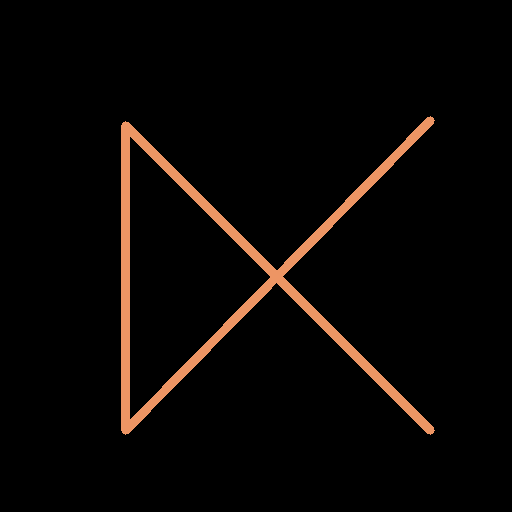

In [53]:
# çizgi
# (resim, başlangıç noktası, bitiş noktası, renk, kalınlık)
cv2.line(img, (125,125), (125,430), (100,149,237), 8) # BGR = (0,255,0)
cv2_imshow(img)

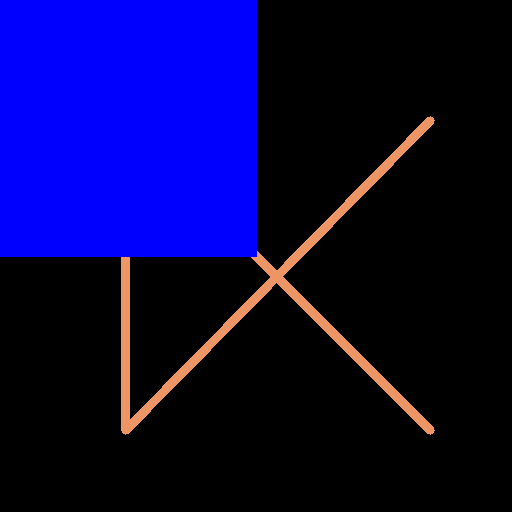

In [54]:
# dikdörtgen
# (resim, başlangıç, bitiş, renk )
cv2.rectangle(img, (0,0), (256,256), (255,0,0), cv2.FILLED)
cv2_imshow(img)

# cv2.FILLED yazılmazsa içi boş olarak gelir

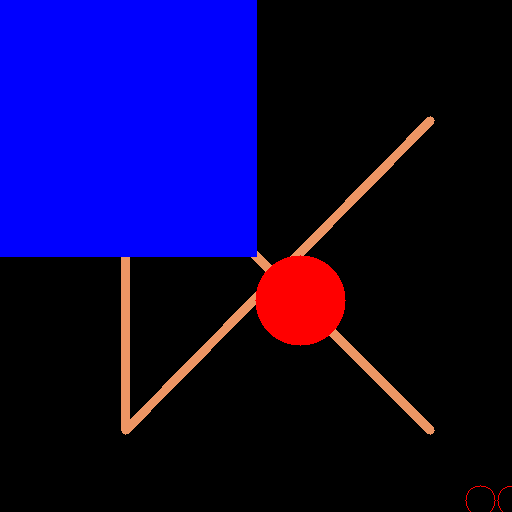

In [56]:
# çember
# (resim, merkez, yarı çap, renk)
cv2.circle(img, (300,300), 45, (0,0,255), cv2.FILLED)
cv2.circle(img, (480,500), 15, (0,0,255)) # içi boş
cv2_imshow(img)

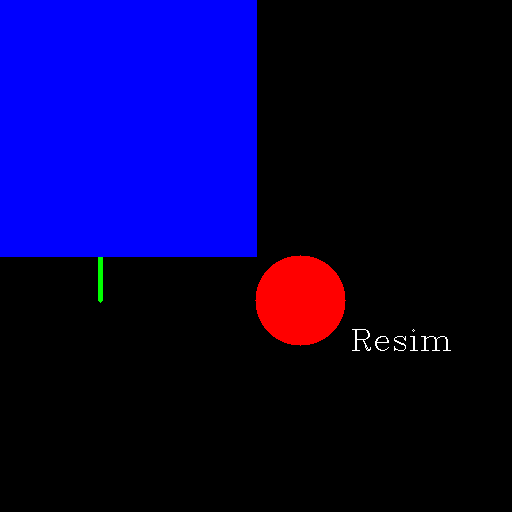

In [44]:
# metin
# (resim, başlangıç noktası, font, kalınlığı, renk)
cv2.putText(img, "Resim", (350,350), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255))
cv2_imshow(img)

### 5. GÖRÜNTÜLERİ BİRLEŞTİRME

In [57]:
import cv2
import numpy as np 

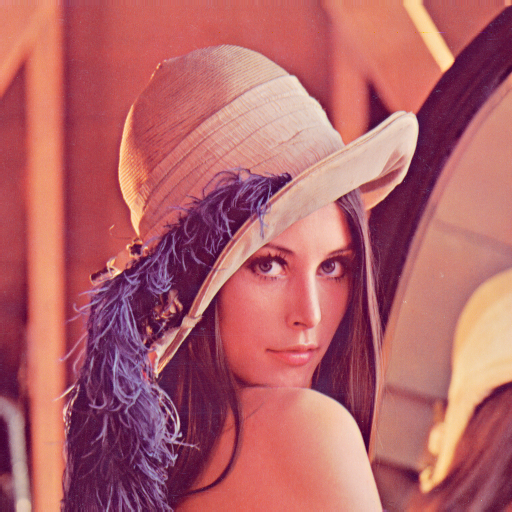

In [59]:
img = cv2.imread("lenna.png")
cv2_imshow(img)

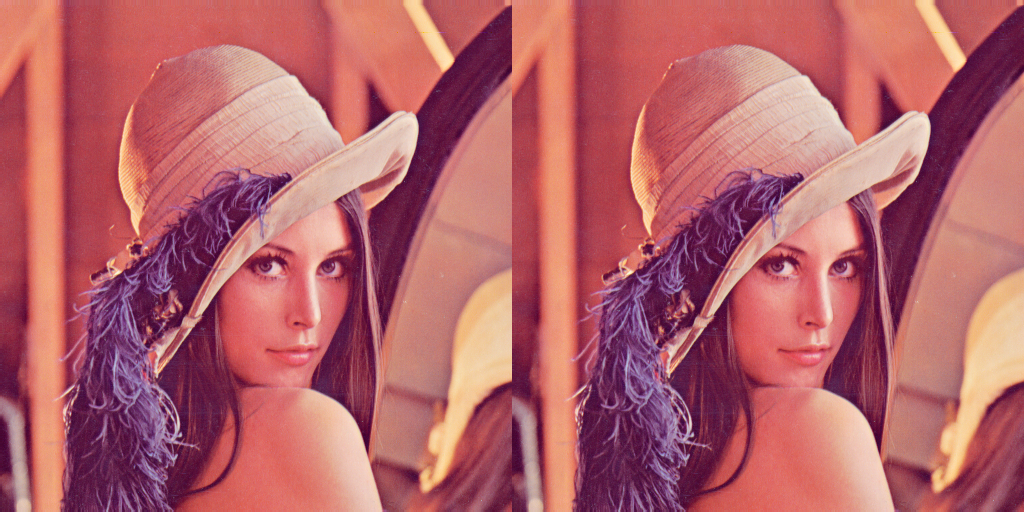

In [61]:
# yatay
hor = np.hstack((img,img))
cv2_imshow(hor)

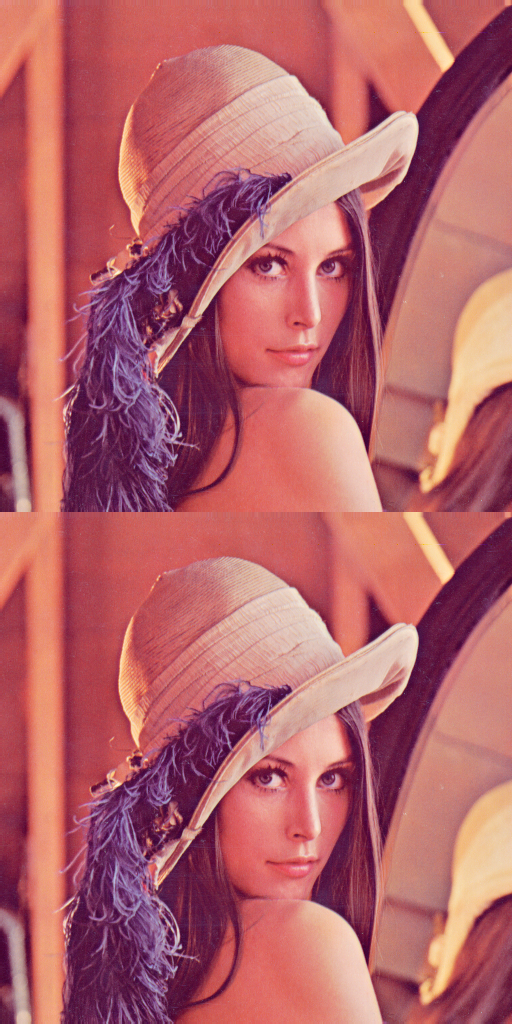

In [63]:
# dikey
ver = np.vstack((img,img))
cv2_imshow(ver)

### 6. PERSPEKTİF ÇARPITMA


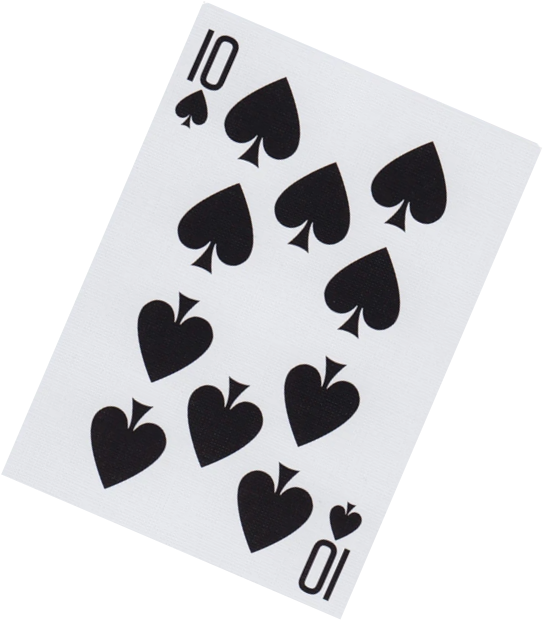

In [64]:
# içe aktar resim
img = cv2.imread("kart.png")
cv2_imshow(img)

In [65]:
width = 400
height = 500

In [66]:
pts1 = np.float32([[230,1],[1,472],[540,150],[338,617]]) # ÇEVİRMEK İSTENİLEN RESMİN KÖEŞELERİ
# aşağıdaki getirilmek istenen hali
pts2 = np.float32([[0,0],[0, height],[width,0],[width,height]])

In [68]:
matrix = cv2.getPerspectiveTransform(pts1, pts2)
print(matrix)

[[ 9.88318421e-01  4.80519997e-01 -2.27793757e+02]
 [-4.28952606e-01  8.92451730e-01  9.77666476e+01]
 [-1.23898125e-04  7.89697479e-05  1.00000000e+00]]


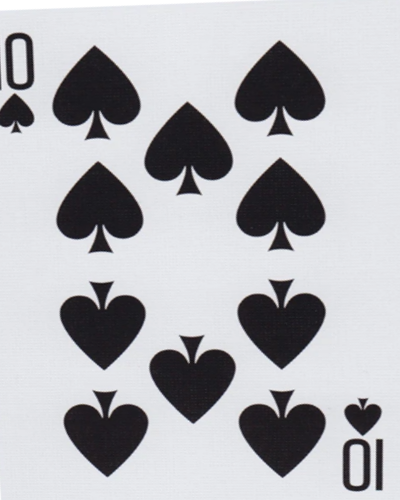

In [71]:
# nihai dönüştürülmüş resim
imgOutput = cv2.warpPerspective(img, matrix, (width,height))
cv2_imshow(imgOutput)

### 7. Görüntüleri Karıştırmak


görüntüleri üst üste birleştirme


In [72]:
import cv2
import matplotlib.pyplot as plt

In [81]:
# karıştırma
img1 = cv2.imread("img1.JPG")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("img2.JPG")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

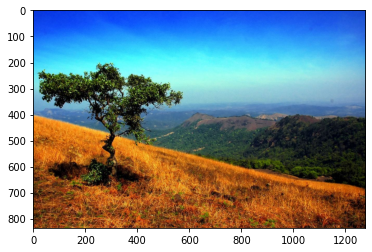

In [82]:
plt.figure()
plt.imshow(img1)

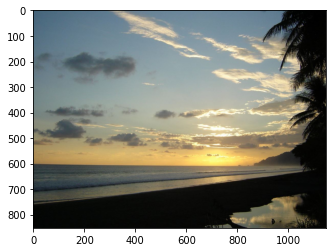

In [83]:
plt.figure()
plt.imshow(img2)

In [84]:
#Birleştirilen 2 resmin boyutları aynı olmalı
print(img1.shape)
print(img2.shape)

(836, 1278, 3)
(852, 1147, 3)


In [85]:
#shapeleri aynı yapma
img1 = cv2.resize(img1, (600,600))
print(img1.shape)

(600, 600, 3)


In [86]:
img2 = cv2.resize(img2, (600,600))
print(img2.shape)

(600, 600, 3)


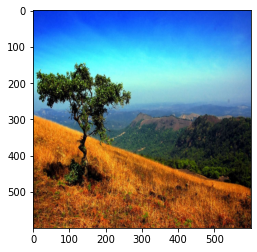

In [87]:
plt.figure()
plt.imshow(img1)

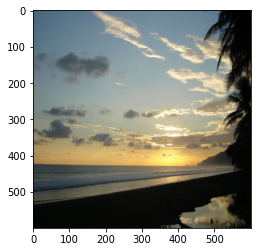

In [88]:
plt.figure()
plt.imshow(img2)

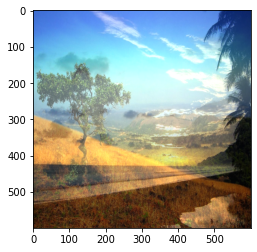

In [90]:
# karıştırılmış resim = alpha*img1 + beta*img2
blended = cv2.addWeighted(src1 = img1, alpha =0.5, src2= img2, beta = 0.8, gamma = 0)
plt.figure()
plt.imshow(blended)

### 8. Görüntüleri Eşikleme


In [91]:
import cv2
import matplotlib.pyplot as plt

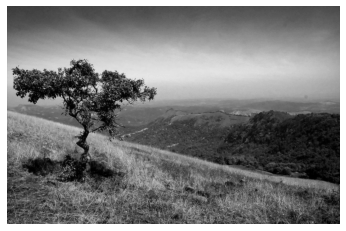

In [92]:
# resmi içe aktar
img = cv2.imread("img1.JPG")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(img, cmap = "gray")
plt.axis("off")
plt.show()

In [93]:
# eşikleme
_, thresh_img = cv2.threshold(img, thresh = 60, maxval = 255, type = cv2.THRESH_BINARY)

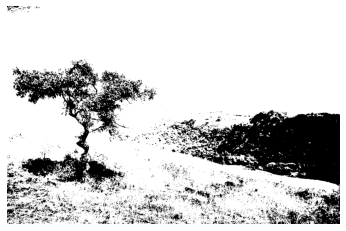

In [94]:
plt.figure()
plt.imshow(thresh_img, cmap = "gray")
plt.axis("off")
plt.show()

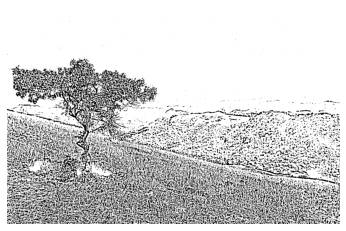

In [95]:
# uyarlamalı eşik değeri
thresh_img2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11,8)
plt.figure()
plt.imshow(thresh_img2, cmap = "gray")
plt.axis("off")
plt.show()

### 9. Görüntüleri Karıştırmak


### 10. Görüntüleri Karıştırmak


### 11. Görüntüleri Karıştırmak
